# Testing the p-value outputs of the Permutation Test Question Generator

This notebook runs two simultaneous permutation tests over a number of iterations, in order to find the absolute difference of the p-values from each test.

This is done to get an idea how how the difference between the pre-computed p-value and the user's p-value is distributed when the generator is run e.g. to work out how close the p-values should be to conclude that the user has done the test correctly when their p-value is compared to the pre-computed p-value.

In [1]:
from TEST_permutation_test_question_generator import TEST_perm_question_cont_2_group, check_my_p_value
import numpy as np
import matplotlib.pyplot as plt

0.0  % done.
5.0  % done.
10.0  % done.
15.0  % done.
20.0  % done.
25.0  % done.
30.0  % done.
35.0  % done.
40.0  % done.
45.0  % done.
50.0  % done.
60.0  % done.
65.0  % done.
70.0  % done.
75.0  % done.
80.0  % done.
85.0  % done.
90.0  % done.
95.0  % done.
99.99  % done.


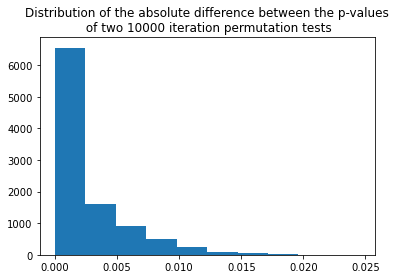

The maximum absolute difference in p-values obtained over 10000 iterations of testing =  0.024499999999999966


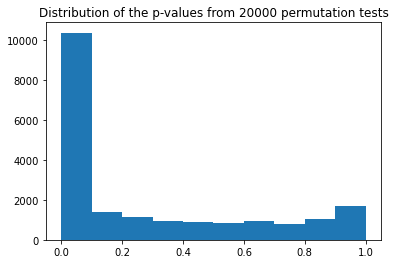

In [2]:
# how many iterations to test over
test_iters = 10000

# an array to store the absolute differences between the p-values
results = np.zeros(test_iters)

# array for results to check the distribution of p-values from each test
p_values_array_1 = np.zeros(test_iters)

p_values_array_2 = np.zeros(test_iters)

# a two permutation tests on each iteration of the test
for iteration in np.arange(test_iters):
    
    # show how far through the testing the routine is
    if (iteration/test_iters * 100)%5 == 0 or iteration == test_iters-1:
        print(iteration/test_iters * 100,' % done.')
    
    n_iters = 10000
    
    # first permutation test is done by this function, outputs the p-value 'answer_p'
    # this is the pre-computed p-value, against which the user's p-value will be compared
    answer_p, sample_1, sample_2 = TEST_perm_question_cont_2_group(n_iters)
    
    fake_differences = np.zeros(n_iters)
    
    # second permutation test (representing a test correctly done by the user)
    for i in np.arange(n_iters):

        together = np.append(sample_1, sample_2)

        shuffled = np.random.permutation(together)

        fake_1 = shuffled[:len(sample_1)]

        fake_2 = shuffled[len(sample_1):]

        fake_diff = fake_1.mean() - fake_2.mean()

        fake_differences[i] = fake_diff

    actual_diff = sample_1.mean() - sample_2.mean()
    user_p = np.count_nonzero(fake_differences >= actual_diff)/10000
    
    # store the absolute difference between the p-values
    results[iteration] = np.abs(answer_p - user_p)
    
    # store the p-values from each permutation test (to check what percentage of the time a sig. effect is generated)
    p_values_array_1[iteration] = answer_p
    p_values_array_2[iteration] = user_p
    
# show the distribution of p-value differences
plt.figure()
plt.title('Distribution of the absolute difference between the p-values\n of two 10000 iteration permutation tests')
plt.hist(results)
plt.show()

# show the maximum absolute difference between the p-values
print('The maximum absolute difference in p-values obtained over '+str(test_iters)+' iterations of testing = ',np.max(results))

# plot the distribution of p-values from both tests
p_values_together = np.append(p_values_array_1, p_values_array_2)
plt.figure()
plt.title('Distribution of the p-values from '+str(test_iters*2)+' permutation tests')
plt.hist(p_values_together)
plt.show()

In [3]:
# how many of times were the p-values significant, in both tests
np.count_nonzero(p_values_together <= 0.05)/len(p_values_together)

0.4637

In [5]:
# how many times was the absolute difference in p-values larger than 0.026 (the cutoff currently used in the p-value check)?

np.count_nonzero(results >= 0.026)/len(results)

0.0